Goal: assess performance of tensor decompsition, and in particular the "how" paramater, in the presence of changing/missing cell types across contexts

In [1]:
suppressPackageStartupMessages({
    library(ggpubr, quietly = T)
    library(plyr, quietly = T)
    library(reshape2, quietly = T)
    
    library(ggplot2, quietly = T)

})

seed <- 888
set.seed(seed)
n.cores <- 15

env.name<-'tc2c_benchmark'
data.path<-'/data/hratch/ccc_protocols/'

Load the data:

In [2]:
res.df<-read.csv(paste0(data.path, 'interim/', 'missing_vals_benchmark.csv'))
res.df<-res.df[colnames(res.df) != 'X']

## Analysis 1: Missing Indices Effect

In [3]:
viz.df<-res.df[,1:(dim(res.df)[[2]]-4)]

viz.df.masked<-cbind(viz.df, res.df[c('corrindex.masked.natmi', 'corrindex.masked.natmi')])
colnames(viz.df.masked)<-c(colnames(viz.df.masked)[1:(dim(viz.df.masked)[[2]]-2)], 'natmi', 'sca')
viz.df.masked<-melt(viz.df.masked, id=colnames(viz.df.masked)[!colnames(viz.df.masked) %in% c('natmi', 'sca')], 
    value.name = 'corrindex', variable.name = 'score.type')
viz.df.masked[['fill_value']]<-'NaN'

viz.df.zeros<-cbind(viz.df, res.df[c('corrindex.zeros.natmi', 'corrindex.zeros.natmi')])
colnames(viz.df.zeros)<-c(colnames(viz.df.zeros)[1:(dim(viz.df.zeros)[[2]]-2)], 'natmi', 'sca')
viz.df.zeros<-melt(viz.df.zeros, id=colnames(viz.df.zeros)[!colnames(viz.df.zeros) %in% c('natmi', 'sca')], 
    value.name = 'corrindex', variable.name = 'score.type')
viz.df.zeros[['fill_value']]<-'0'

viz.df<-rbind(viz.df.masked, viz.df.zeros)

viz.df[['celltype.consistent']]<-as.factor(viz.df$celltype.consistent)
viz.df[['lr.consistent']]<-as.factor(viz.df$celltype.consistent)

Does the fraction of missing indices effect the CorrIndex?

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


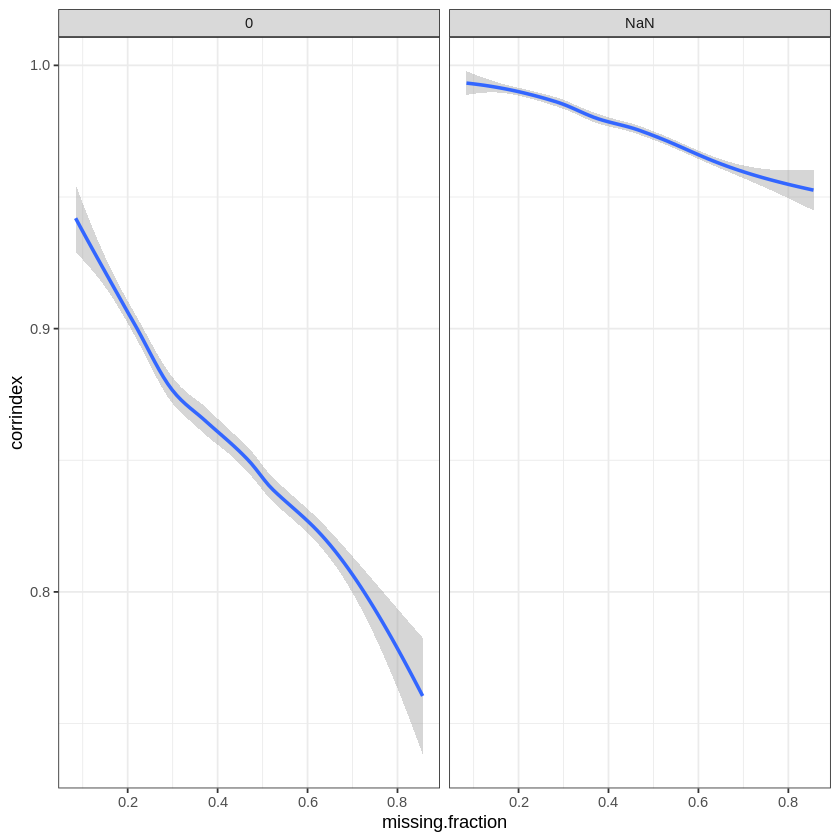

In [4]:
g1<-ggplot(viz.df, aes(x=missing.fraction, y=corrindex)) +
  geom_smooth() + facet_wrap(~fill_value) + theme_bw()
g1

Conclusion: While the fraction of missing indices clearly has an effect on CorrIndex (likely statistically significant), the effect size is pretty negligible 

Do either the score type or whether the same element is removed change the effect of the missing fraction on the CorrIndex?

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


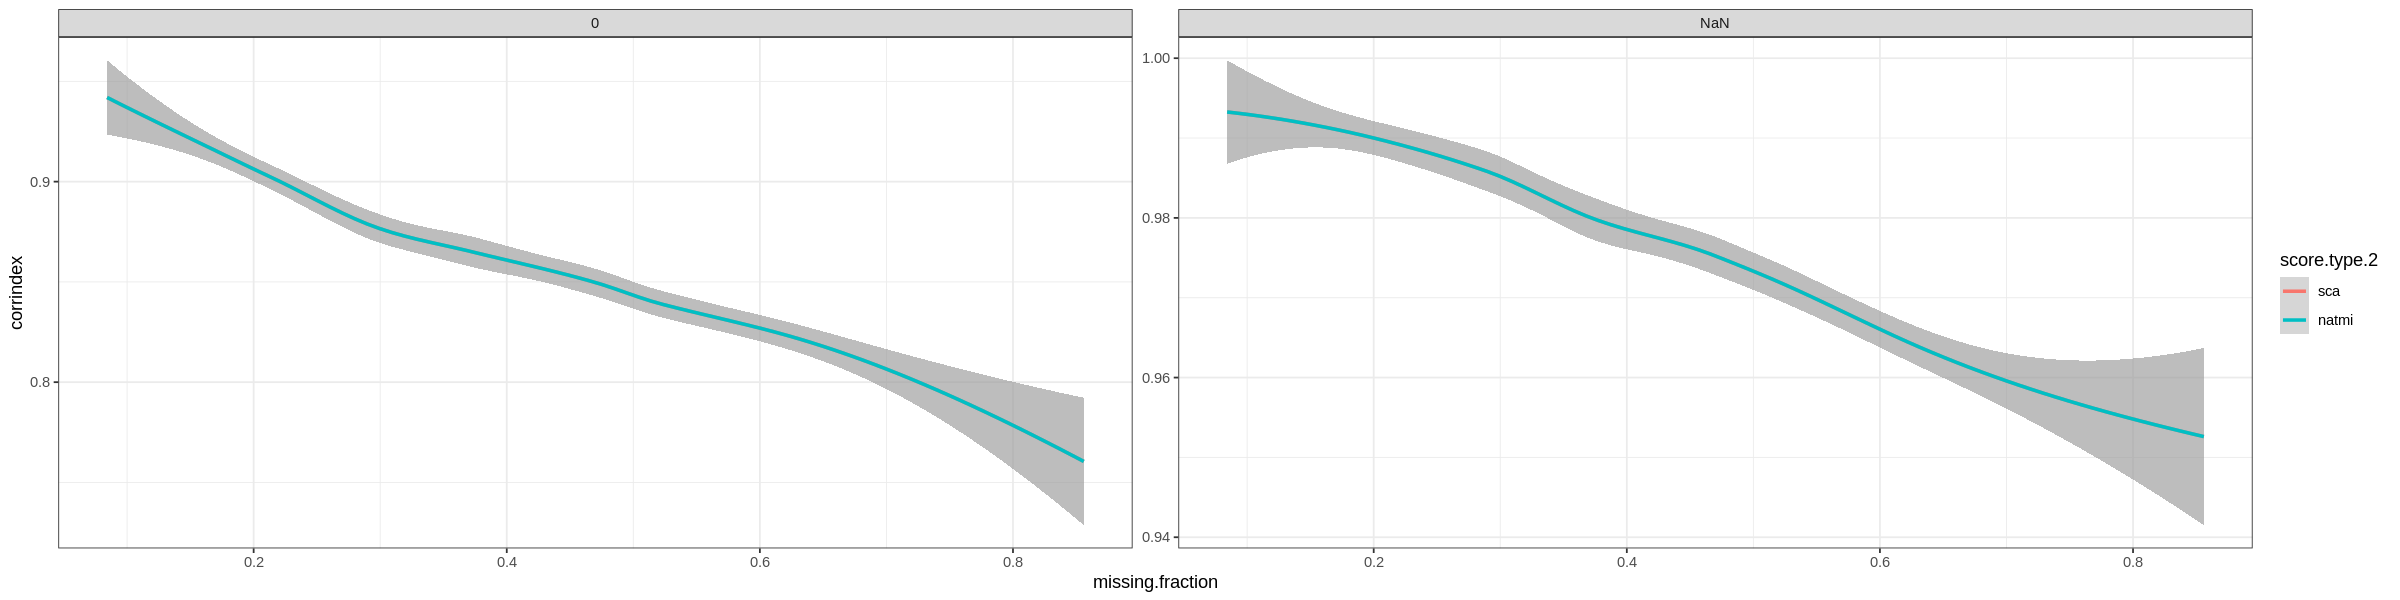

In [17]:
h_ = 5
w_ = 20
options(repr.plot.height=h_, repr.plot.width=w_)

viz.df[['score.type.2']]<-factor(viz.df$score.type, levels = c('sca', 'natmi'))
ggplot(viz.df, aes(x=missing.fraction, y=corrindex, color = score.type.2)) +
  geom_smooth() + facet_wrap(~fill_value, scales = 'free') + theme_bw()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


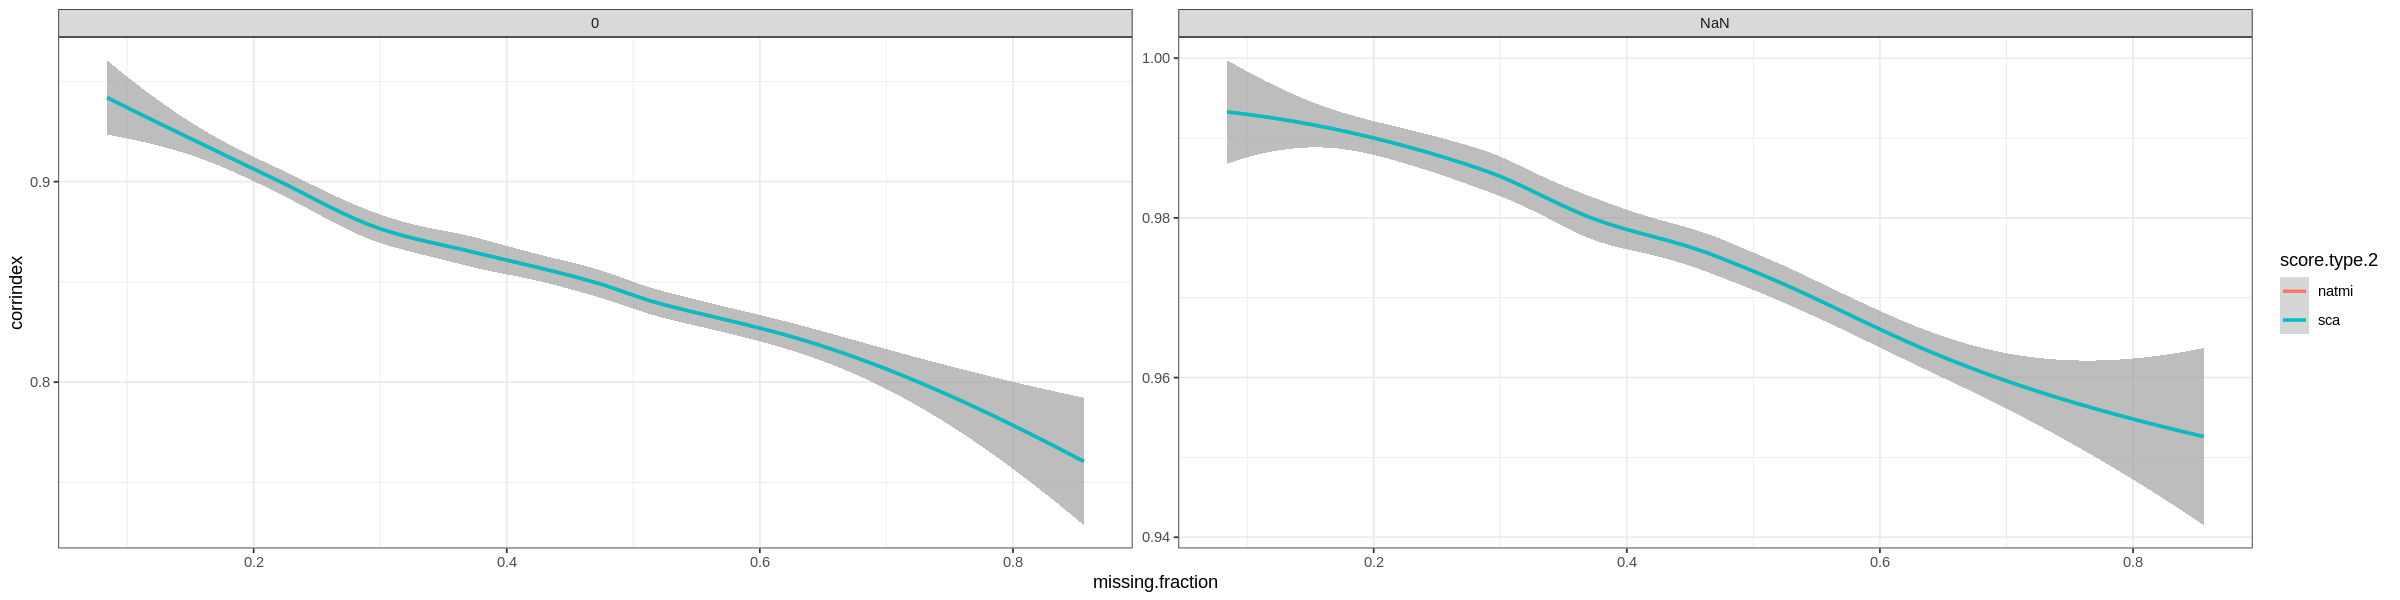

In [18]:
h_ = 5
w_ = 20
options(repr.plot.height=h_, repr.plot.width=w_)

viz.df[['score.type.2']]<-factor(viz.df$score.type, levels = c('natmi', 'sca'))
ggplot(viz.df, aes(x=missing.fraction, y=corrindex, color = score.type.2)) +
  geom_smooth() + facet_wrap(~fill_value, scales = 'free') + theme_bw()

# You are Here

In [21]:
i<-1
ctf<-unique(viz.df$celltype.fraction)[[i]]
lrf<-unique(viz.df$lr.fraction)[[i]]
cf<-unique(viz.df$context.fraction)[[i]]
ctc<-unique(viz.df$celltype.consistent)[[i]]
lrc<-unique(viz.df$lr.consistent)[[i]]

viz.df[(viz.df$celltype.fraction == ctf) & 
      (viz.df$lr.fraction == lrf) & 
      (viz.df$context.fraction == cf) & 
      (viz.df$celltype.consistent == ctc) & 
      (viz.df$lr.consistent == lrc), ]

,iteration,celltype.fraction,lr.fraction,context.fraction,celltype.consistent,lr.consistent,missing.fraction,score.type,corrindex,fill_value,score.type.2
,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<chr>,<fct>
1,1,0.1666667,0.1,0.2,1,1,0.1268454,natmi,0.9922874,NaN,natmi
2,2,0.1666667,0.1,0.2,1,1,0.1051671,natmi,0.9949213,NaN,natmi
145,1,0.1666667,0.1,0.2,1,1,0.1268454,sca,0.9922874,NaN,sca
146,2,0.1666667,0.1,0.2,1,1,0.1051671,sca,0.9949213,NaN,sca
289,1,0.1666667,0.1,0.2,1,1,0.1268454,natmi,0.9033496,0,natmi
290,2,0.1666667,0.1,0.2,1,1,0.1051671,natmi,0.9001210,0,natmi
433,1,0.1666667,0.1,0.2,1,1,0.1268454,sca,0.9033496,0,sca
434,2,0.1666667,0.1,0.2,1,1,0.1051671,sca,0.9001210,0,sca


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


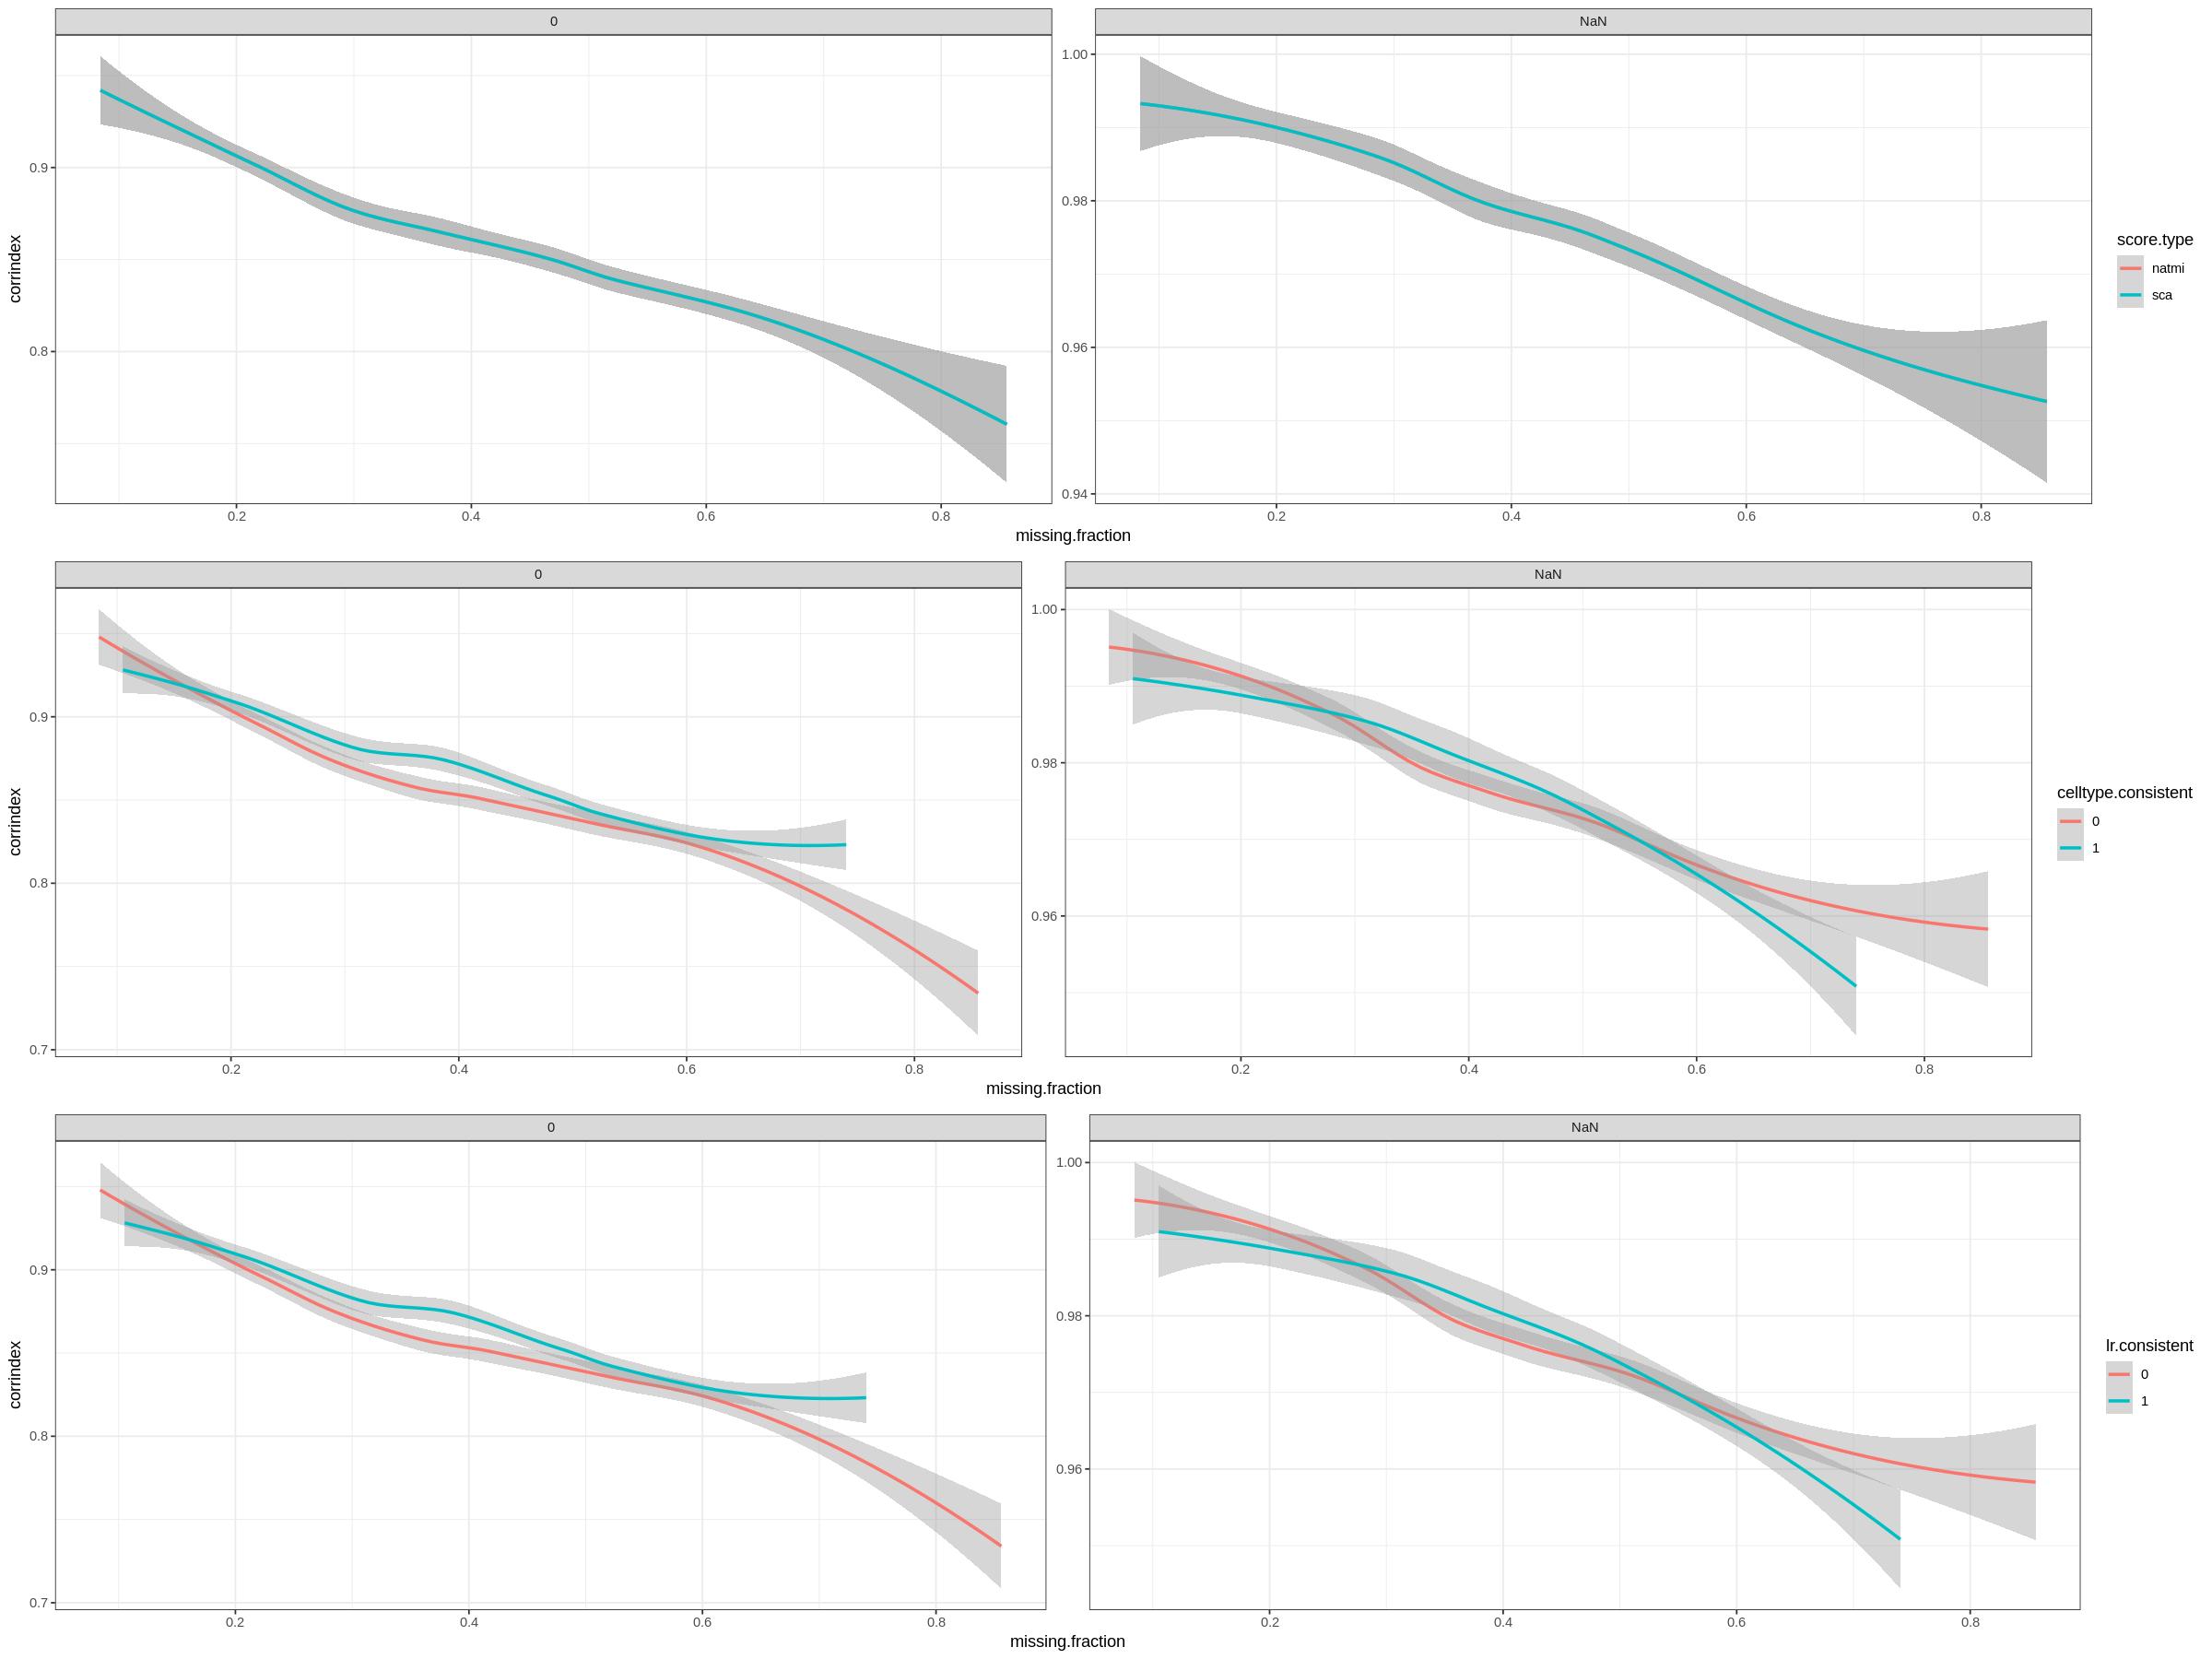

In [5]:
h_ = 15
w_ = 20
options(repr.plot.height=h_, repr.plot.width=w_)

g2a<-ggplot(viz.df, aes(x=missing.fraction, y=corrindex, color = score.type)) +
  geom_smooth() + facet_wrap(~fill_value, scales = 'free') + theme_bw()
g2b<-ggplot(viz.df, aes(x=missing.fraction, y=corrindex, color = celltype.consistent)) +
  geom_smooth() + facet_wrap(~fill_value, scales = 'free') + theme_bw()
g2c<-ggplot(viz.df, aes(x=missing.fraction, y=corrindex, color = lr.consistent	)) +
  geom_smooth() + facet_wrap(~fill_value, scales = 'free') + theme_bw()
g2<-ggpubr::ggarrange(g2a, g2b, g2c, ncol = 1)
g2

* SCA consistnely outperforms NATMI across missing fractions, but there doesnt seem to be a strong effect of scoring method on (i.e., the slopes are the same b)
* Whether the same elements are removed across contexts or different ones doesn’t effect CorrIndex strongly for either the cell type or LR dimensions; at high and low missing fractions, removing the same elements seems to perform slightly worse (need statistical testing with binned violinplots), and vice versa at middle ranges of missing fraction


In [249]:
# head(viz.df)

,iteration,celltype.fraction,lr.fraction,context.fraction,celltype.consistent,lr.consistent,missing.fraction,score.type,corrindex
,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,1,0.1666667,0.1,0.2,1,1,0.12531080,natmi,0.9922528
2,2,0.1666667,0.1,0.2,1,1,0.10437063,natmi,0.9949525
3,3,0.1666667,0.1,0.2,0,0,0.09108392,natmi,0.9976709
4,4,0.1666667,0.1,0.2,0,0,0.08356643,natmi,0.9929904
5,5,0.1666667,0.1,0.4,1,1,0.15957653,natmi,0.9835308
6,6,0.1666667,0.1,0.4,1,1,0.18673271,natmi,0.9789397


Do any of the specific elements going missing have a stronger influence on the CorrIndex (e.g., missing LRs vs missing contexts vs missing cell types)? 

In [306]:
# # # have to add jitter for geome_smooth function, come back to this
# # # https://stackoverflow.com/questions/38864458/loess-warnings-errors-related-to-span-in-r
# # for (col in c('celltype.fraction', 'lr.fraction', 'context.fraction')){
# #     viz.df[[col]] <- jitter(viz.df[[col]], factor = 0.05)
# # }
# for (col in c('celltype.fraction', 'lr.fraction', 'context.fraction')){
#     viz.df[[col]] <- as.factor(viz.df[[col]])
# }



In [327]:
# unique(viz.df$context.fraction)

[1] 0.2 0.4 0.6
Levels: 0.2 0.4 0.6

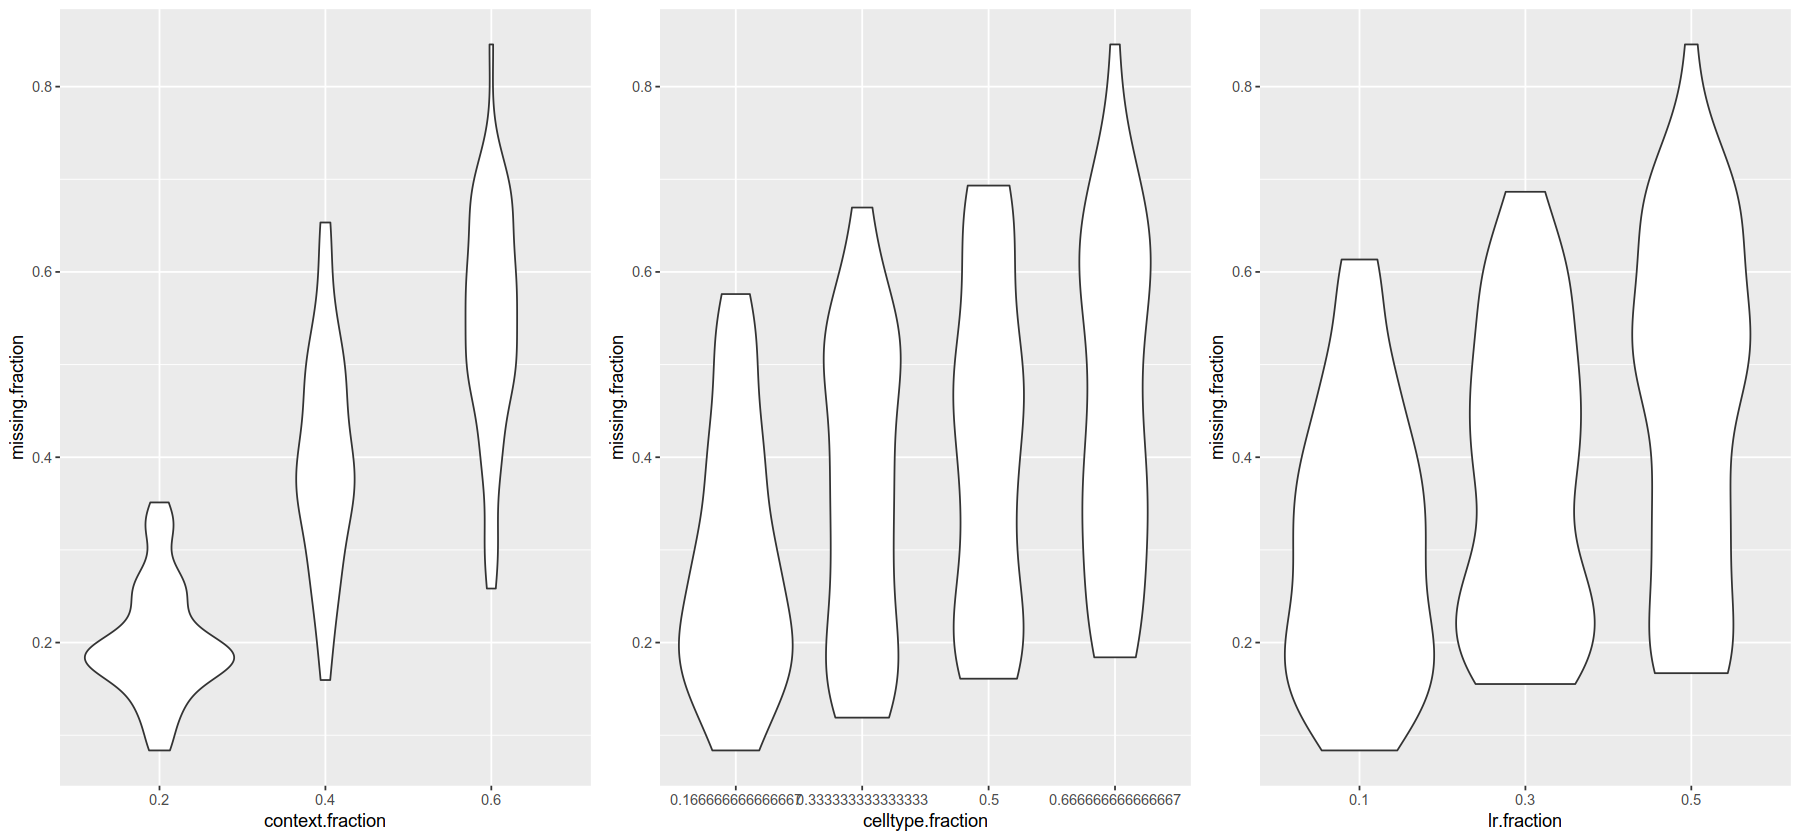

In [331]:
# g3a<-ggplot(viz.df, aes(y=missing.fraction, x=context.fraction)) + geom_violin() 
# g3b<-ggplot(viz.df, aes(y=missing.fraction, x=celltype.fraction)) + geom_violin() 
# g3c<-ggplot(viz.df, aes(y=missing.fraction, x=lr.fraction)) + geom_violin() 

# g3<-ggpubr::ggarrange(g3a, g3b, g3c, ncol = 3)
# g3

First, we see that each has a similar relationship with the total missing fraction. 

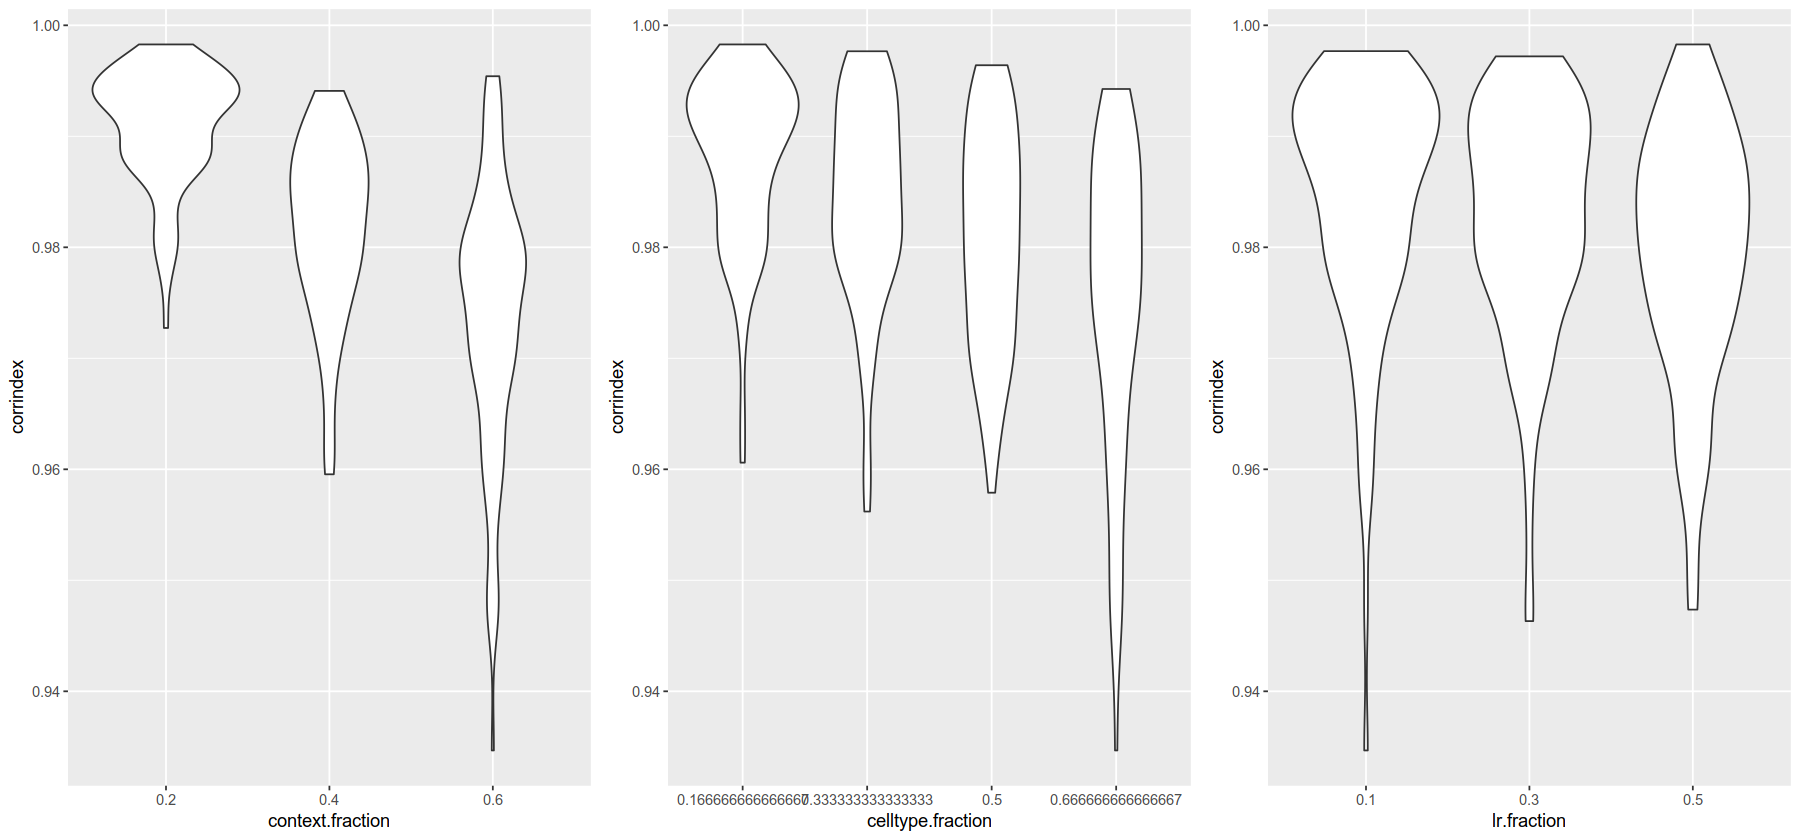

In [333]:
# g4a<-ggplot(viz.df, aes(y=corrindex, x=context.fraction)) + geom_violin() 
# g4b<-ggplot(viz.df, aes(y=corrindex, x=celltype.fraction)) + geom_violin() 
# g4c<-ggplot(viz.df, aes(y=corrindex, x=lr.fraction)) + geom_violin() 

# g4<-ggpubr::ggarrange(g4a, g4b, g4c, ncol = 3)
# g4

Based on the first panel, for better rigor in the future, we may have to first control for how much each of these missing fractions increases the total missing fraction when running this comparison (e.g., overall, a missing ligand receptor fraction will not increase the total missing fraction as much as the other 2 dimensions, so obviously this will have less of an effect on the CorrIndex). Hard to draw any conclusions from just this visual.
